# Deep Learning with Keras and Tensorflow Project

### Lending Club Loan Data Analysis

#### DESCRIPTION

- Create a model that predicts whether or not a loan will be default using the historical data.

#### Problem Statement:  

- For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

#### Domain: 
- Finance

- Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

#### Content: 

- Dataset columns and definition:

1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

2. purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

3. int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

4. installment: The monthly installments owed by the borrower if the loan is funded.

5. log.annual.inc: The natural log of the self-reported annual income of the borrower.

6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

7. fico: The FICO credit score of the borrower.

8. days.with.cr.line: The number of days the borrower has had a credit line.

9. revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

10. revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

11. inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

12. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

13. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

#### Steps to perform:

- Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

#### Tasks:

1. Feature Transformation

    - Transform categorical values into numerical values (discrete)

2. Exploratory data analysis of different factors of the dataset.

3. Additional Feature Engineering

    - You will check the correlation between features and will drop those features which have a strong correlation

    - This will help reduce the number of features and will leave you with the most relevant features

4. Modeling

   - After applying EDA and feature engineering, you are now ready to build the predictive models

   - In this part, you will create a deep learning model using Keras with Tensorflow backend

### Data Preprocessing 
### Deep Learning Model

In [1]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load the dataset
df=pd.read_csv('Project 2 DLKT Lending Club Loan Data Analysis.csv')

In [3]:
#shape of data and Shape is a attribute not function
df.shape

(9578, 14)

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
# Null value
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
# check how many fully paid(0) and how many not fully paid(1)
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

# EDA

### Exploratory data analysis of different factors of the dataset.

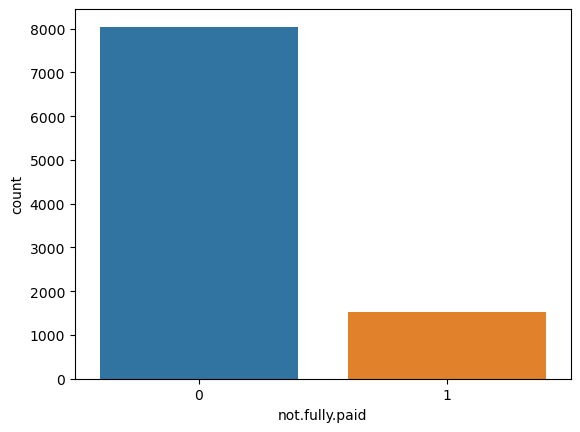

In [7]:
sns.countplot(x=df['not.fully.paid'])
plt.show()

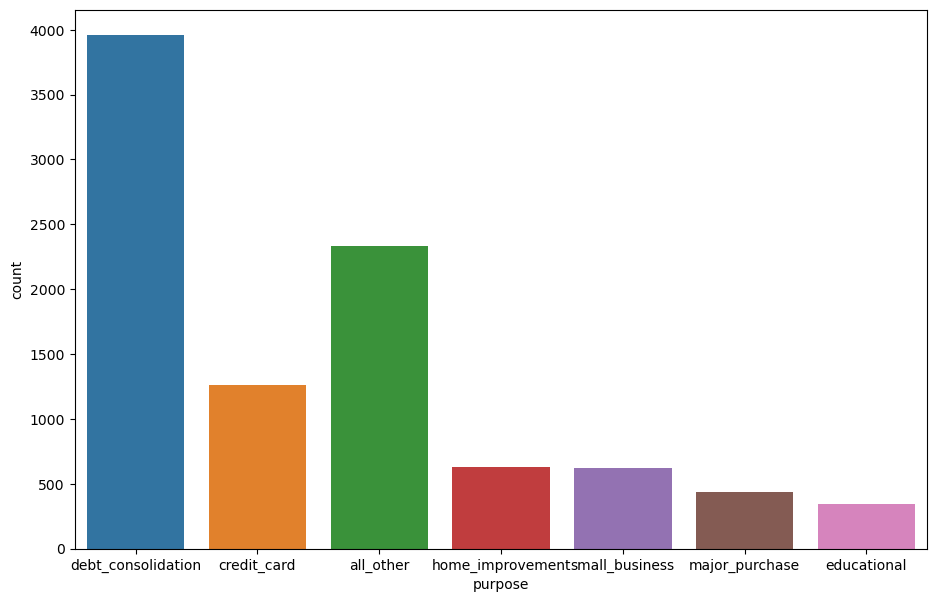

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x=df['purpose'])
plt.show()

### Handle imbalanced data

- like smote
- sampling

In [9]:
#perform some sampling but before sampling let's create some variable
#create 2 varibale df
fully_paid_0=df[df['not.fully.paid']==0]
not_fully_paid_1=df[df['not.fully.paid']==1]

In [10]:
fully_paid_0.shape

(8045, 14)

In [11]:
not_fully_paid_1.shape

(1533, 14)

In [12]:
# resampling to handle the imbalanced data
from sklearn.utils import resample
df_sampled_data=resample(not_fully_paid_1,replace=True,n_samples=8045)

In [13]:
df_sampled_data.shape

(8045, 14)

In [14]:
#Concatenating
new_df=pd.concat([fully_paid_0,df_sampled_data])

In [15]:
#Let's Shuffle the data
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [16]:
new_df.shape

(16090, 14)

### 1. Feature Transformation

Transform categorical values into numerical values (discrete)

- Extract the best feature
- scaling the data
- chategorical values to numerical value
- encoding

In [17]:
new_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [18]:
#Apply Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [20]:
new_df.dtypes

credit.policy          int64
purpose                int32
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [21]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1172,1,1,0.1008,232.60,10.545341,18.09,722,2369.958333,12391,66.6,1,0,0,0
4416,1,0,0.1218,166.50,11.119883,14.99,697,3874.958333,1461,23.2,1,1,1,0
8879,0,2,0.1379,340.76,10.858999,21.99,682,3030.041667,6641,31.6,4,0,0,1
2262,1,1,0.1189,258.68,10.778956,9.63,742,4953.041667,3501,23.5,1,0,0,1
9269,0,6,0.1739,358.48,12.206073,10.80,687,4649.958333,191303,78.2,5,0,0,1


In [22]:
le.classes_

array(['all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype=object)

### 3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

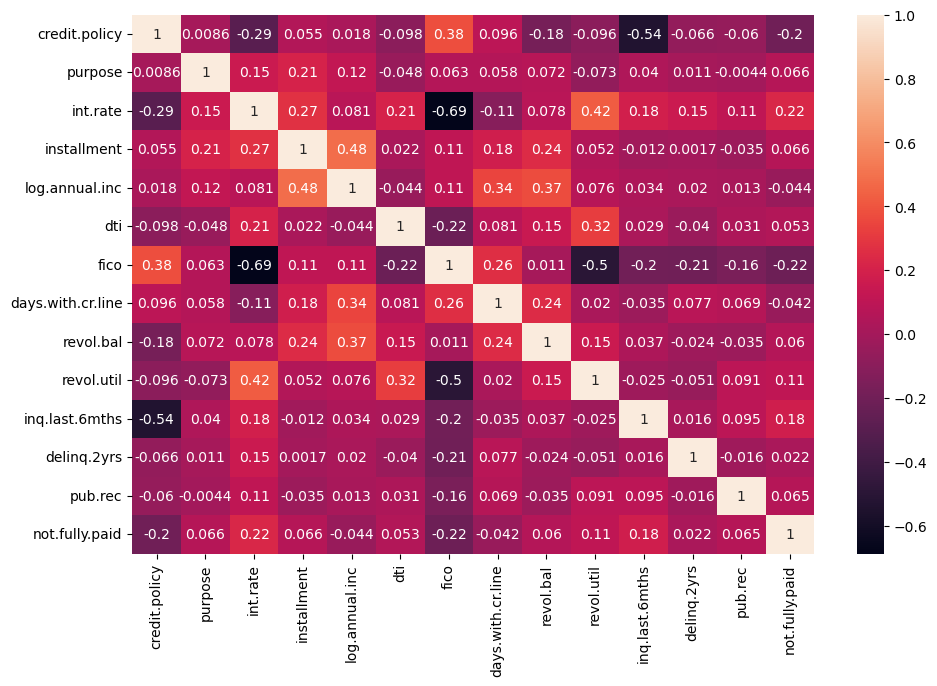

In [23]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [24]:
#Show the corr
#If we showing positive and negative then we use absolute() function
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.223107
fico                 0.218499
credit.policy        0.202111
inq.last.6mths       0.180392
revol.util           0.107086
purpose              0.065774
installment          0.065766
pub.rec              0.065430
revol.bal            0.060223
dti                  0.053306
log.annual.inc       0.044266
days.with.cr.line    0.041809
delinq.2yrs          0.022335
Name: not.fully.paid, dtype: float64

In [25]:
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [26]:
#prepare input data
X=new_df[['credit.policy','purpose','int.rate','installment',
         'fico','revol.bal','revol.util','inq.last.6mths','pub.rec']]

In [27]:
X.shape

(16090, 9)

In [28]:
#Prepare output data
y=new_df[['not.fully.paid']]

In [29]:
y.shape

(16090, 1)

### 4. Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [30]:
#Creating trainset & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train

,credit.policy,purpose,int.rate,installment,fico,revol.bal,revol.util,inq.last.6mths,pub.rec
1605,1,3,0.1114,82.02,692,51489,77.9,2,0
8451,0,2,0.1482,297.37,647,4181,97.2,2,0
647,1,2,0.1387,264.39,682,26996,66.8,0,0
2125,1,4,0.1316,185.74,692,22479,86.8,2,0
6508,1,2,0.1287,302.70,687,9846,80.0,0,0
...,...,...,...,...,...,...,...,...,...
4706,1,2,0.1392,546.20,687,23839,59.3,1,0
6984,1,2,0.1531,522.23,682,51605,97.9,1,0
88,1,1,0.1533,644.30,662,22379,62.2,0,0
8891,0,0,0.1537,139.39,682,1272,38.5,0,0


In [32]:
#Need to required standard scaling
# Apply standard scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [33]:
X_train

array([[ 0.58500555,  0.5507311 , -0.56800491, ...,  0.9931069 ,
         0.03208118, -0.26683168],
       [-1.7093855 , -0.01467094,  0.80146802, ...,  1.65184872,
         0.03208118, -0.26683168],
       [ 0.58500555, -0.01467094,  0.44793561, ...,  0.61424503,
        -0.72771457, -0.26683168],
       ...,
       [ 0.58500555, -0.58007297,  0.99125911, ...,  0.4572392 ,
        -0.72771457, -0.26683168],
       [-1.7093855 , -1.145475  ,  1.00614468, ..., -0.35168209,
        -0.72771457, -0.26683168],
       [ 0.58500555,  2.2469372 , -0.16981577, ..., -1.26299849,
        -0.72771457, -0.26683168]])

In [34]:
#Build the predictive models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
#Create Neural Network
model=Sequential()

# Create first hidden layer #for hidden layer you must use 'relu' and 'tanh'
model.add(Dense(19,activation='relu',input_shape=(9,)))
model.add(Dropout(0.3))

#Create second hidden layer
model.add(Dense(10,activation='relu')) #No need to give input_shape again, it only give one time
model.add(Dropout(0.3))

#Create output layer #And sigmoid use for binary classification for output layer
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
#Early stopping
early_stop=EarlyStopping(monitor='val_loss',
                       min_delta=0.01,
                       mode='min',
                       verbose=1,
                       patience=10)

In [39]:
history=model.fit(X_train,y_train,
                 epochs=50,
                 batch_size=256,
                 validation_data=(X_test,y_test),
                 callbacks=[early_stop])

Epoch 1/50
51/51 [==============================] - 1s 6ms/step - loss: 0.7397 - accuracy: 0.5170 - val_loss: 0.6830 - val_accuracy: 0.5348
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5390 - val_loss: 0.6656 - val_accuracy: 0.5907
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5603 - val_loss: 0.6585 - val_accuracy: 0.6131
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5751 - val_loss: 0.6523 - val_accuracy: 0.6175
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.5760 - val_loss: 0.6503 - val_accuracy: 0.6190
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.5812 - val_loss: 0.6476 - val_accuracy: 0.6190
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.5905 - val_loss: 0.6482 - val_accuracy: 0.6209
Epoch 8/50
51/51 [==

In [40]:
#If we not using early-stopping it will give all 50 epochs
history=model.fit(X_train,y_train,
                 epochs=50,
                 batch_size=256,
                 validation_data=(X_test,y_test),)

Epoch 1/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.6070 - val_loss: 0.6401 - val_accuracy: 0.6296
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6076 - val_loss: 0.6404 - val_accuracy: 0.6293
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.6133 - val_loss: 0.6396 - val_accuracy: 0.6290
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6106 - val_loss: 0.6387 - val_accuracy: 0.6274
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.6144 - val_loss: 0.6388 - val_accuracy: 0.6274
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.6148 - val_loss: 0.6378 - val_accuracy: 0.6314
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6133 - val_loss: 0.6385 - val_accuracy: 0.6259
Epoch 8/50
51/51 [==

In [41]:
X_train.shape

(12872, 9)

In [42]:
12872/256

50.28125

In [43]:
#Evaluation the model
model.evaluate(X_test,y_test)

101/101 [==============================] - 0s 1ms/step - loss: 0.6347 - accuracy: 0.6318


[0.6347000598907471, 0.6317588686943054]

In [44]:
#Evaluation the model
model.evaluate(X_train,y_train)

403/403 [==============================] - 1s 1ms/step - loss: 0.6376 - accuracy: 0.6360


[0.6375932097434998, 0.6359540224075317]

In [45]:
#!pip install keras-tuner
#!pip install tensorflow
import keras_tuner
import tensorflow

In [46]:
#Create a function
def build_model(hp):
    model=Sequential()
    
    #First hidden layer #for hidden layer you must use 'relu' and 'tanh'
    #And sigmoid use for binary classification for output layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    
    #second hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    
    #Third hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    
    #Output Layer
    model.add(Dense(1,activation='sigmoid'))
    
    #Compilation
    learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.01)
    
    model.compile(loss='binary_crossentropy',optimizer=tensorflow.keras.optimizers.Adam
                 (learning_rate),metrics=['accuracy'])
    
    return model

In [47]:
import keras_tuner as kt

In [48]:
build_model(kt.HyperParameters())

In [49]:
rtuner=kt.RandomSearch(hypermodel=build_model,
                      objective='val_accuracy',
                      max_trials=3,
                      overwrite=True)

In [50]:
rtuner.search(X_train,y_train,epochs=4,validation_data=(X_test,y_test),verbose=1)
#Atleast 50 epochs should be run(and it will reach up to 70% accuracy)

Trial 3 Complete [00h 00m 46s]
val_accuracy: 0.5009322762489319

Best val_accuracy So Far: 0.59664386510849
Total elapsed time: 00h 01m 31s
INFO:tensorflow:Oracle triggered exit


In [51]:
rtuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
units: 512
activation: tanh
rate: 0.4
learning_rate: 0.051000000000000004
Score: 0.59664386510849

Trial 0 summary
Hyperparameters:
units: 544
activation: tanh
rate: 0.2
learning_rate: 0.051000000000000004
Score: 0.549098789691925

Trial 2 summary
Hyperparameters:
units: 832
activation: relu
rate: 0.30000000000000004
learning_rate: 0.051000000000000004
Score: 0.5009322762489319


In [52]:
models=rtuner.get_best_models()

In [53]:
models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

In [54]:
#Print accurcy score
from sklearn.metrics import accuracy_score
y_pred_hp=models[0].predict(X_test,)>=0.5

101/101 [==============================] - 0s 3ms/step


In [55]:
y_pred_hp

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [56]:
y_test

,not.fully.paid
6286,1
1913,0
9303,1
7476,0
7034,1
...,...
2781,1
2665,1
7762,1
1103,0


In [57]:
accuracy_score(y_pred_hp,y_test)

0.5966438781852083